In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("playstore-analysis (2) (1).csv",index_col = False)

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 1. Data clean up – Missing value treatment 

### a. Drop records where rating is missing since rating is our target/study variable 

In [6]:
df.dropna(subset=['Rating'],inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column. 

In [7]:
# i. Are all 3 records having the same problem? 
df[df['Android Ver'].isnull()]
# YES, all 3 records having NaN for the Android Ver column.
df.shape

(9367, 13)

In [8]:
# ii. Drop the 3rd record i.e. record for “Life Made WIFI …” 
df.drop(index=10472,inplace=True)

In [9]:
df.shape

(9366, 13)

In [10]:
# iii. Replace remaining missing values with the mode 
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [11]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [12]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

### c. Current ver – replace with most common value

In [13]:
df['Current Ver'].mode()

0    Varies with device
dtype: object

In [14]:
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [15]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 2. Data clean up – correcting the data types 

### a. Which all variables need to be brought to numeric types? 

In [16]:
df.info()
# Below Variables need to be brought to numeric types
# Reviews
# Installs
# Price

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


### b. Price variable – remove $ sign and convert to ﬂoat

In [17]:
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())

In [18]:
df['Price'] = (df['Price']).astype('float')

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer 

In [19]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [20]:
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))

In [21]:
df['Installs'] = (df['Installs']).astype('int')

In [22]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### d. Convert all other identiﬁed columns to numeric

In [23]:
df['Reviews'] = (df['Reviews']).astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


# 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store. 

In [25]:
df['Rating'].mean()

4.191757420456978

### b. Reviews should not be more than installs as only those who installed can review the app. 
i. Are there any such records? Drop if so. 

In [26]:
count_index = df.loc[df['Reviews'] > df['Installs']].index

In [27]:
df.drop(count_index,inplace=True)
df.shape

(9359, 13)

# 4. Identify and handle outliers – 

### a. Price column 

### i. Make suitable plot to identify outliers in price 

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

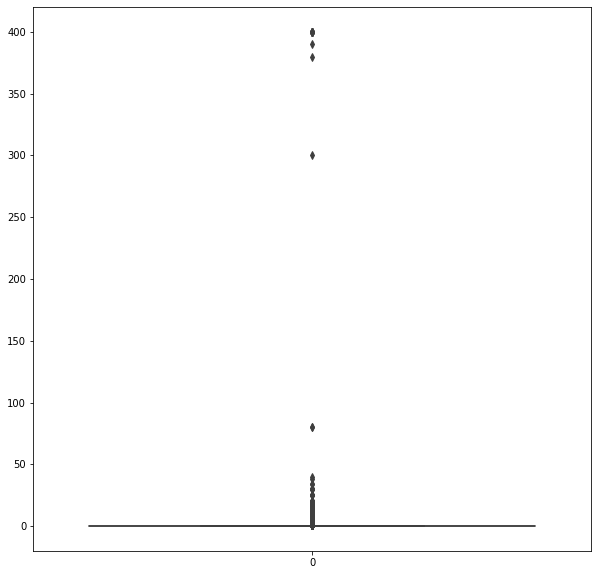

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df['Price'])

### ii. Do you expect apps on the play store to cost $200? Check out these cases 

In [30]:
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [31]:
df.drop(df.loc[df['Price'] > 200].index,inplace=True)

In [32]:
df.shape

(9344, 13)

### iii. After dropping the useless records, make the suitable plot again to identify outliers 

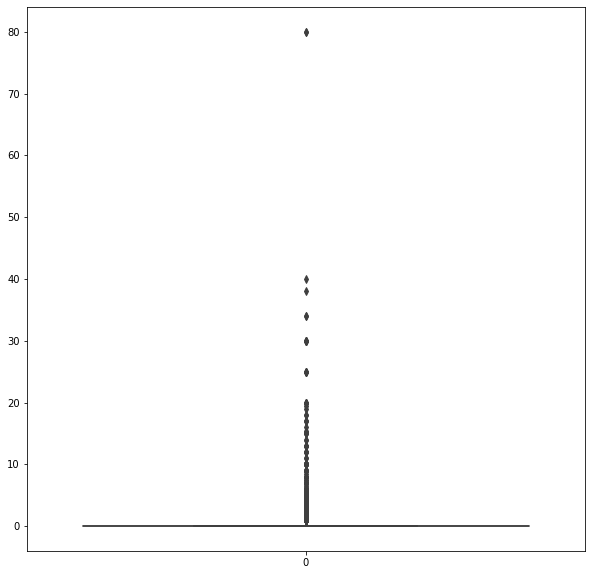

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df['Price'])

### iv. Limit data to records with price < $30 

In [34]:
df.loc[df['Price'] > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [35]:
df.drop(df.loc[df['Price'] > 30].index,inplace=True)

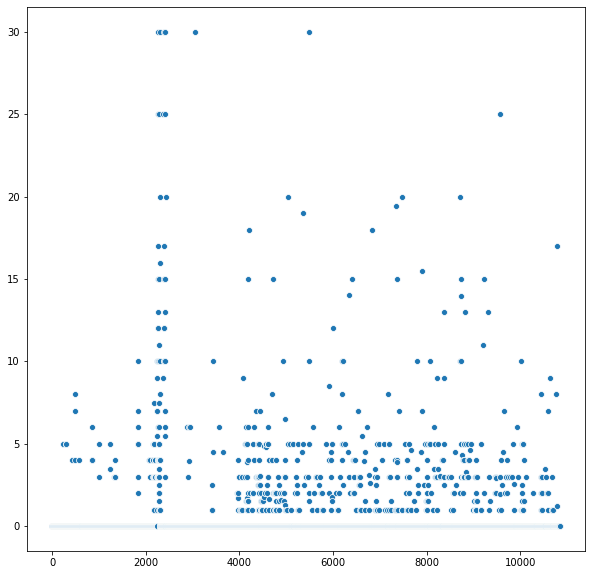

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df['Price'])

### b. Reviews column 

### i. Make suitable plot 

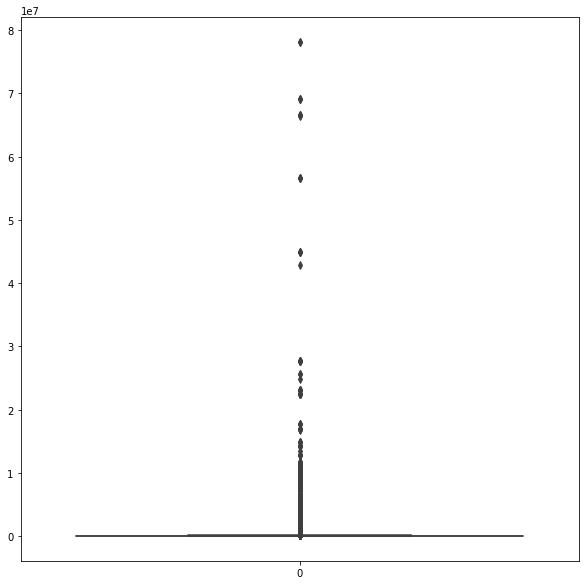

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df['Reviews'])

In [38]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [39]:
df.loc[df['Reviews'] > 1000000].shape

(704, 13)

In [40]:
df.drop(df.loc[df['Reviews'] > 1000000].index,inplace=True)

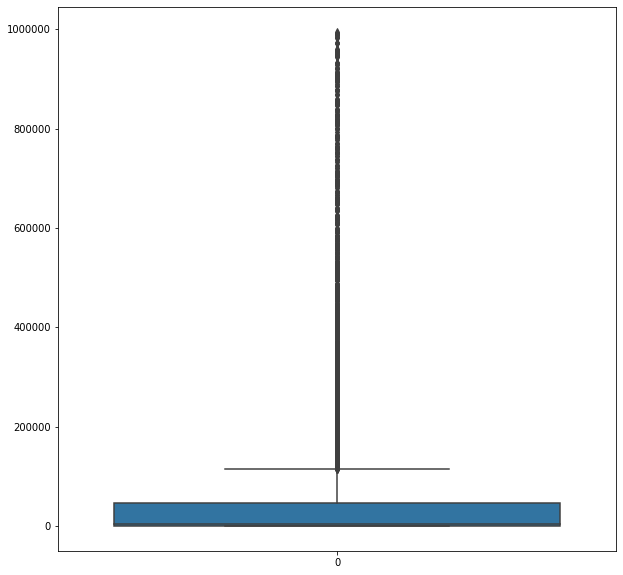

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df['Reviews'])

# c. Installs 

### i. What is the 95th percentile of the installs?

#### https://www.dummies.com/education/math/statistics/how-to-calculate-percentiles-in-statistics/

In [42]:
# df.Installs.quantile(0.95)
Installs_95th_percentile = df['Installs'].loc[round(df['Installs'].sort_values().count() * 0.95)]
Installs_95th_percentile

5000000

In [43]:
df.shape

(8634, 13)

### ii. Drop records having a value more than the 95th percentile 

In [44]:
df.drop(df.loc[df['Installs'] > Installs_95th_percentile].index,inplace=True)

In [45]:
df.shape

(7258, 13)

# Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values? 

a. How do you explain this?
b. What is the implication of this on your analysis? 

-1.6376046624161658

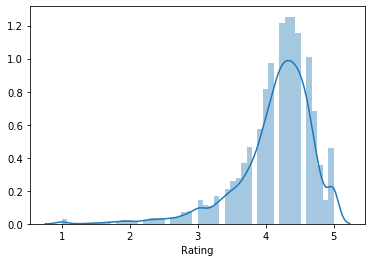

In [46]:
sns.distplot(df['Rating'])
df['Rating'].skew()
# The distribution of Ratings looks clear without outliers and most of th apps having good Rating rahing from 3.5 to 4.5

# 6. What are the top Content Rating values? 

In [47]:
df['Content Rating'].mode()

0    Everyone
dtype: object

### a. Are there any values with very few records? 

In [48]:
df['Content Rating'].value_counts()
# Yes there are urated and Adults only 18+ with very few records

Everyone           5913
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### b. If yes, drop those as they won’t help in the analysis 

In [49]:
df.drop(df.loc[df['Content Rating'] == 'Adults only 18+'].index,inplace=True)
df.drop(df.loc[df['Content Rating'] == 'Unrated'].index,inplace=True)

In [50]:
df['Content Rating'].value_counts()

Everyone        5913
Teen             746
Mature 17+       346
Everyone 10+     249
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating 

b. Do you see any patterns? 

c. How do you explain the pattern? 

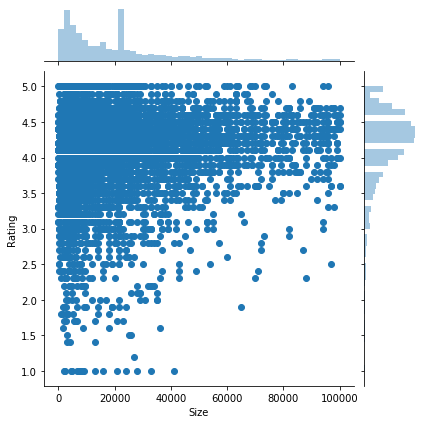

In [51]:
sns.jointplot(data=df,x='Size',y='Rating')
plt.show()

### Yes, there is correlation between Size and Rating and it is clear that for higher rating there is constant size. 

# 8. Effect of price on rating

### a. Make a jointplot (with regression line) 

In [3]:
sns.jointplot(data=df,x='Price',y='Rating',kind='reg')
plt.show()

NameError: name 'sns' is not defined

### b. What pattern do you see? 

Increasing the Price, Rating remains almost same greater than 4.

### c. How do you explain the pattern? 
There is very weak Positive correlation between Rating and Price.

In [53]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.142365,0.040777,0.075935,0.039910
Reviews,0.142365,1.000000,0.200294,0.644043,-0.058061
Size,0.040777,0.200294,1.000000,0.174992,0.010602
Installs,0.075935,0.644043,0.174992,1.000000,-0.102352
Price,0.039910,-0.058061,0.010602,-0.102352,1.000000


### d. Replot the data, this time with only records with price > 0 

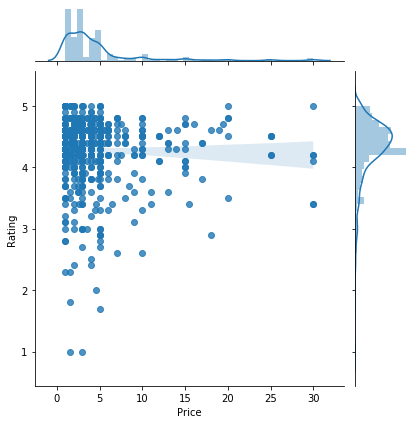

In [54]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

### e. Does the pattern change? 
Yes, On limiting the record with Price > 0, the overall pattern changed to very weakly Negative Correlation between Price and Rating.

In [55]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.100276,0.117628,0.094668,-0.025284
Reviews,0.100276,1.000000,0.189052,0.753153,-0.039973
Size,0.117628,0.189052,1.000000,0.234729,0.025376
Installs,0.094668,0.753153,0.234729,1.000000,-0.069255
Price,-0.025284,-0.039973,0.025376,-0.069255,1.000000


### f. What is your overall inference on the effect of price on the rating 

Increasing the Price, not showing much impact on Higher Rating. 
For Higher Price, Rating is High and almost constant

### 9. Look at all the numeric interactions together – 
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price' 

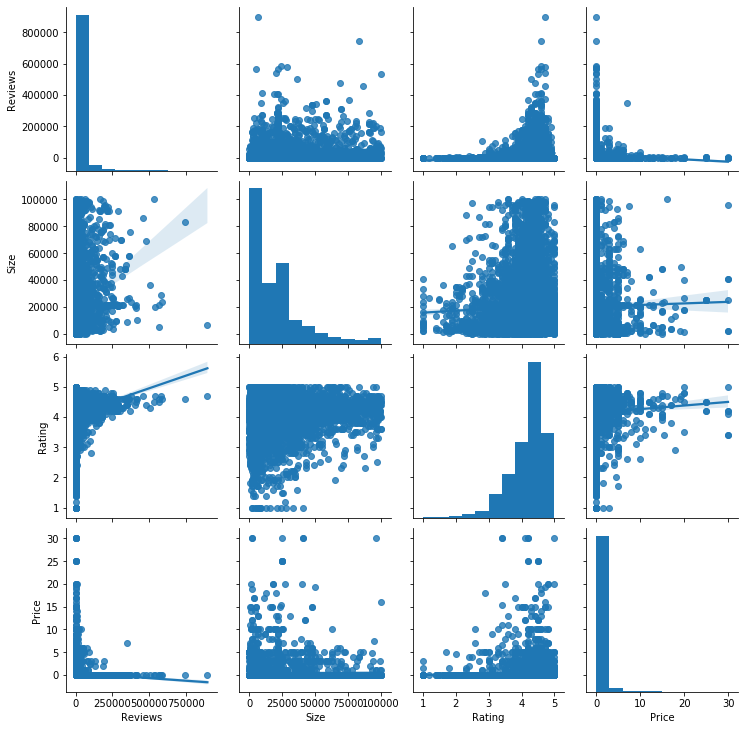

In [56]:
sns.pairplot(data=df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

### 10.Rating vs. content rating 
a. Make a bar plot displaying the rating for each content rating 

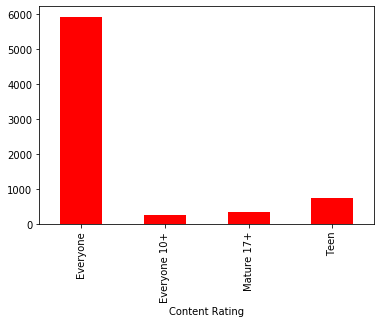

In [57]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="r")

b. Which metric would you use? Mean? Median? Some other quantile? 

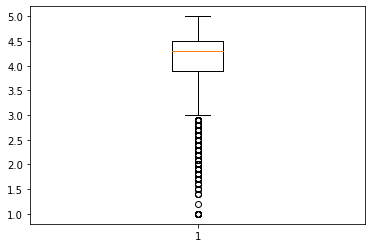

In [58]:
# We must use Median in this case as there are Outliers in Rating. 
plt.boxplot(df['Rating'])
plt.show()

c. Choose the right metric and plot 

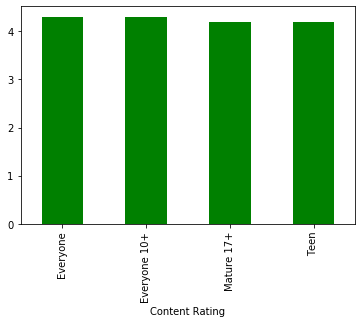

In [59]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar(color="g")

### 11. Content rating vs. size vs. rating – 3 variables at a time 
a. Create 5 buckets (20% records in each) based on Size 

In [60]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.136404,4.214865,3.990058,4.175758
20k-40k,4.163083,4.140952,4.144348,4.159292
40k-60k,4.144717,4.232432,4.177143,4.232184
60k-80k,4.206081,4.289474,4.228571,4.244231
80k-100k,4.213821,4.221429,4.290909,4.243137


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination 

In [61]:
bucket=pd.pivot_table(df, values='Rating', index='Bucket Size', 
                     columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
bucket

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.00,3.50,3.8
20k-40k,3.8,3.90,3.90,3.9
40k-60k,3.8,4.00,4.10,4.0
60k-80k,3.9,4.16,3.96,3.9
80k-100k,3.9,3.92,4.00,4.0


### c. Make a heatmap of this 
i. Annotated 

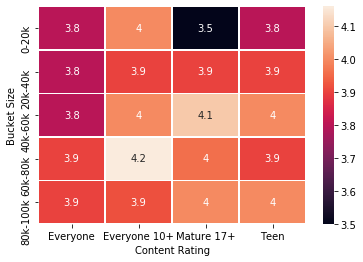

In [62]:
sns.heatmap(bucket, annot=True, linewidths=.5)
plt.show()

### ii. Greens color map 

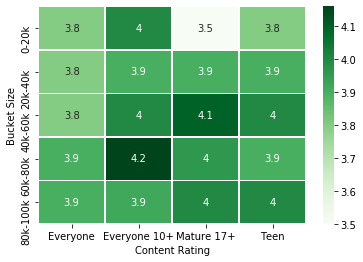

In [63]:
sns.heatmap(bucket, annot=True, linewidths=.5,cmap='Greens')
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

From analysis, apps with size 40k-60k and 80k-100k have highest rating in all categories.
So,we can say that heavier apps are preferred in all categories.